# **Kaggle – DataTops®**
Tu TA ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a tu profe a mejorar ese modelo?

## Aspectos importantes
- Última submission:
    - Mañana: 17 de febrero a las 5pm
    - Tarde: 19 de febrero a las 5pm
- **Enlace de la competición**: https://www.kaggle.com/t/c5cc87b50c4b4770bdc8f5acbe15577d
- **Requisito**: Estar registrado en [Kaggle](https://www.kaggle.com/)

## Métrica:
El error cuadrático medio (RMSE, por sus siglas en inglés) es una medida de la desviación estándar de los residuos (errores de predicción). Los residuos representan la diferencia entre los valores observados y los valores predichos por el modelo. El RMSE indica qué tan dispersos están estos errores: cuanto menor es el RMSE, más cercanas están las predicciones a los valores reales. En otras palabras, el RMSE mide qué tan bien se ajusta la línea de regresión a los datos.


$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$


## 1. Librerías

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import urllib.request
from toolbox_ML import describe_df, tipifica_variables, get_features_num_regression, plot_features_num_regression, get_features_cat_regression, plot_features_cat_regression

## 2. Datos

In [2]:
# Para que funcione necesitas bajarte los archivos de datos de Kaggle
df_laptop = pd.read_csv("./data/train.csv")

In [3]:
df=df_laptop.copy()

### 2.1 Exploración de los datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_in_euros    912 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 92.8+ KB


In [5]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
0,755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
1,618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
2,909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
3,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
4,286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00


In [6]:
df.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
907,28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00
908,1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00
909,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00
910,23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00
911,229,Dell,Alienware 17,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42kg,2456.34


In [7]:
df.describe()

,laptop_ID,Inches,Price_in_euros
count,912.000000,912.000000,912.000000
mean,650.312500,14.981579,1111.724090
std,382.727748,1.436719,687.959172
min,2.000000,10.100000,174.000000
25%,324.750000,14.000000,589.000000
50%,636.500000,15.600000,978.000000
75%,982.250000,15.600000,1483.942500
max,1320.000000,18.400000,6099.000000


In [8]:
describe_df(df)

,DATA_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
laptop_ID,int64,0.0,912,100.00
Price_in_euros,float64,0.0,603,66.12
Product,object,0.0,480,52.63
Weight,object,0.0,165,18.09
Cpu,object,0.0,107,11.73
Gpu,object,0.0,93,10.20
Memory,object,0.0,37,4.06
ScreenResolution,object,0.0,36,3.95
Company,object,0.0,19,2.08
Inches,float64,0.0,17,1.86


In [9]:
tipifica_variables(df)

,nombre_variable,tipo_sugerido
0,laptop_ID,Numerica Continua
1,Company,Categórica
2,Product,Categórica
3,TypeName,Categórica
4,Inches,Numerica Discreta
5,ScreenResolution,Categórica
6,Cpu,Categórica
7,Ram,Categórica
8,Memory,Categórica
9,Gpu,Categórica


- A pesar de lo que me sugiere mi funcion tambien tienes que ver la naturaleza del dato y lo qu ele puede venir mejor al problema y al modelo.

Diagnóstico del dataset: 


- Columnas numéricas limpias:
    - Inches
    - Price_in_euros

- Columnas numéricas mal tipificadas:
    - Ram → "8GB"
    - Weight → "1.86kg"

- Columnas categóricas simples
    - Company
    - TypeName
    - OpSys

- Columnas categóricas de alta cardinalidad:

    - Product → demasiadas categorías → no aporta → eliminar.

- Columnas textuales complejas. Estas son las que más trabajo requieren:

| Columna           | Problema                               | Solución                                   |
|-------------------|------------------------------------------|---------------------------------------------|
| Cpu               | Mezcla marca, familia, frecuencia        | Extraer marca, familia y GHz                |
| Gpu               | Mezcla marca y modelo                    | Extraer marca                               |
| ScreenResolution  | Mezcla tipo de panel + resolución        | Extraer X, Y y calcular PPI                 |
| Memory            | Mezcla SSD, HDD, Flash, Hybrid           | Separar SSD, HDD, Flash y Hybrid            |


### 2.2 Limpieza y tipificación

- Tratamiento de la variable **RAM**:
    - La columna viene como texto: "8GB", "16GB".
    - Eliminamos "GB" para quedarnos solo con el número.
    - Convertimos a entero para que el modelo pueda usarlo como variable numérica.

In [10]:
df["Ram"] = df["Ram"].str.replace("GB", "").astype(int)

In [11]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
0,755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
1,618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
2,909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
3,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
4,286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00
908,1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00
909,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00
910,23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    int64  
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_in_euros    912 non-null    float64
dtypes: float64(2), int64(2), object(9)
memory usage: 92.8+ KB


Aqui puedo observar que ya se hay quitado la parte de GB y se ha convertido en una variable numerica 

- Tratamiento de la variable **Weight**:
    - La columna viene como "1.86kg".
    - Quitamos "kg" y lo convertimos a float.
    - El peso es una variable numérica muy útil para predecir precio.


In [13]:
df["Weight"] = df["Weight"].str.replace("kg", "").astype(float)


In [14]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
0,755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.86,539.00
1,618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59,879.01
2,909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04,900.00
3,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
4,286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M430,Linux,2.25,428.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 530,Windows 10,2.20,800.00
908,1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.48,1629.00
909,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,2TB HDD,Intel HD Graphics 620,No OS,2.20,519.00
910,23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4,500GB HDD,AMD Radeon R2,No OS,1.86,258.00


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    int64  
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    float64
 12  Price_in_euros    912 non-null    float64
dtypes: float64(3), int64(2), object(8)
memory usage: 92.8+ KB


- Tratamiento de la variable **ScreenResolution**:
    - Resolucion: En mi experiencia de usurio cuando iba a elegir protatil la resolucion es uno de los factors que mas influeyen en el precio.
    - PPI (Pixeles por pulgada): es un amedida de la densidad de pixeles, es decir, cuantos pixeles caben en una pulgada de pantalla y cuanto mayor el es el PPI mas nitida se ve la pantalla, mas calidad tiene la pantalla y mas caro es el panel.
    $$ PPI = \frac{\sqrt{X_{res}^2 + Y_{res}^2}}{Inches} $$
    - Tambien voy a controlar que se un panel IPS, tactil, 4k y de retina. Para el modelo de regresion lineal no influye tanto por en los modelos de arboles de decision puede ayudarles.

In [16]:
# Procesamiento completo de ScreenResolution 

# Extraer resolución X(Horizontal) e Y(Vertical)
df["X_res"] = df["ScreenResolution"].str.extract(r'(\d+)x').astype(int)
df["Y_res"] = df["ScreenResolution"].str.extract(r'x(\d+)').astype(int)

# Calcular PPI
df["ppi"] = ((df["X_res"]**2 + df["Y_res"]**2)**0.5) / df["Inches"]

# Flags adicionales
df["is_ips"] = df["ScreenResolution"].str.contains("IPS", case=False).astype(int)
df["is_touch"] = df["ScreenResolution"].str.contains("Touchscreen", case=False).astype(int)
df["is_4k"] = df["ScreenResolution"].str.contains("3840x2160|4K", case=False).astype(int)
df["is_retina"] = df["ScreenResolution"].str.contains("Retina", case=False).astype(int)



In [17]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,X_res,Y_res,ppi,is_ips,is_touch,is_4k,is_retina
0,755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.86,539.00,1920,1080,141.211998,0,0,0,0
1,618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59,879.01,1920,1080,141.211998,0,0,0,0
2,909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04,900.00,1920,1080,141.211998,0,0,0,0
3,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1440,900,127.677940,0,0,0,0
4,286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M430,Linux,2.25,428.00,1920,1080,141.211998,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 530,Windows 10,2.20,800.00,1920,1080,141.211998,0,0,0,0
908,1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.48,1629.00,1920,1080,165.632118,0,1,0,0
909,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,2TB HDD,Intel HD Graphics 620,No OS,2.20,519.00,1920,1080,141.211998,0,0,0,0
910,23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4,500GB HDD,AMD Radeon R2,No OS,1.86,258.00,1366,768,100.454670,0,0,0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    int64  
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    float64
 12  Price_in_euros    912 non-null    float64
 13  X_res             912 non-null    int64  
 14  Y_res             912 non-null    int64  
 15  ppi               912 non-null    float64
 16  is_ips            912 non-null    int64  
 1

- Tratamiento de la variable **CPU**:
    - La columna Cpu contiene información mezclada (vamos a extraer cada parte):

        - Marca → Intel, AMD
        - Familia → i3, i5, i7, Ryzen 5…
        - Frecuencia → 2.5GHz, 3.1GHz…

- ¿Por qué?
    - Intel y AMD tienen gamas y precios distintos.
    - Es una señal fuerte para el modelo.

In [19]:
#Extraer marca de CPU
df["Cpu_brand"] = df["Cpu"].str.split().str[0]


- ¿Por qué?
    - La familia indica rendimiento.
    - Un i7 suele ser más caro que un i3.
    - Ryzen 5 suele ser más caro que Ryzen 3.

In [20]:
#Extraer familia de CPU
'''df["Cpu_family"] = df["Cpu"].str.extract(r'(i3|i5|i7|i9|Ryzen\s?\d|Pentium|Celeron|Atom)')'''
'''df["Cpu_family"] = df["Cpu"].str.extract(
    r'(i3|i5|i7|i9|Ryzen\s?\d|Pentium|Celeron|Atom|Core\s?M|Xeon|A\d|FX|Snapdragon)'
)'''
'''df["Cpu_family"] = df["Cpu"].str.extract(
    r'(i3|i5|i7|i9|Ryzen\s?\d|Pentium|Celeron|Atom|Core\s?M|Xeon|A\d|FX|E-\d+)'
)'''
df["Cpu_family"] = df["Cpu"].str.extract(
    r'(i3|i5|i7|i9|Ryzen\s?\d|Pentium|Celeron|Atom|Core\s?M|Xeon|A\d|FX|E-Series)'
)





<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\César\AppData\Local\Temp\ipykernel_41116\1719123120.py:2: SyntaxWarning: invalid escape sequence '\s'
  '''df["Cpu_family"] = df["Cpu"].str.extract(r'(i3|i5|i7|i9|Ryzen\s?\d|Pentium|Celeron|Atom)')'''
C:\Users\César\AppData\Local\Temp\ipykernel_41116\1719123120.py:4: SyntaxWarning: invalid escape sequence '\s'
  r'(i3|i5|i7|i9|Ryzen\s?\d|Pentium|Celeron|Atom|Core\s?M|Xeon|A\d|FX|Snapdragon)'
C:\Users\César\AppData\Local\Temp\ipykernel_41116\1719123120.py:7: SyntaxWarning: invalid escape sequence '\s'
  r'(i3|i5|i7|i9|Ryzen\s?\d|Pentium|Celeron|Atom|Core\s?M|Xeon|A\d|FX|E-\d+)'


- ¿Por qué?
    - La frecuencia es un valor numérico útil.
    - No es el único factor de rendimiento, pero ayuda.

In [21]:
#Extraer frecuencia (GHz)
'''df["Cpu_freq"] = df["Cpu"].str.extract(r'(\d\.\d+)GHz').astype(float)'''
df["Cpu_freq"] = df["Cpu"].str.extract(r'(\d+(?:\.\d+)?)GHz').astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\César\AppData\Local\Temp\ipykernel_41116\176554484.py:2: SyntaxWarning: invalid escape sequence '\d'
  '''df["Cpu_freq"] = df["Cpu"].str.extract(r'(\d\.\d+)GHz').astype(float)'''


- Tratamiento de la variable **GPU**
    - La columna Gpu contiene:
        - Marca → Intel, Nvidia, AMD
        - Modelo completo → GTX 1050, Radeon R5…

- ¿Por qué?
    - Nvidia suele ser más cara que Intel integrada.
    - AMD está en un punto intermedio.
    - Es una señal muy fuerte del precio.

In [22]:
#5.1 Extraer marca de GPU
df["Gpu_brand"] = df["Gpu"].str.split().str[0]

- Tratamiento de la variable Memory:

    - ¿Por qué?
        - Convertimos TB → GB multiplicando por 1000.
        - Eliminamos espacios para facilitar el parsing.
        - Ejemplo: "1TB SSD" → "1000SSD"


In [23]:
'''df["Gpu_family"] = df["Gpu"].str.extract(
    r'(GTX|RTX|MX|Radeon\s?RX|Radeon\s?R\d|HD|UHD|Iris)'
)'''

'''df["Gpu_family"] = df["Gpu"].str.extract(
    r'(GTX|RTX|MX|GeForce|Quadro|FirePro|Radeon\s?Pro|Radeon\s?RX|Radeon\s?R\d|Radeon\s?\d{3}|R\dM|HD|UHD|Iris|Graphics)'
)'''

df["Gpu_family"] = df["Gpu"].str.extract(
    r'(GTX|RTX|MX|GeForce|Quadro|FirePro|Radeon\s?Pro|Radeon\s?RX|Radeon\s?R\d|Radeon\s?\d{3}|R\d+M|HD|UHD|Iris|Graphics)'
)




<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\César\AppData\Local\Temp\ipykernel_41116\3781194967.py:2: SyntaxWarning: invalid escape sequence '\s'
  r'(GTX|RTX|MX|Radeon\s?RX|Radeon\s?R\d|HD|UHD|Iris)'
C:\Users\César\AppData\Local\Temp\ipykernel_41116\3781194967.py:6: SyntaxWarning: invalid escape sequence '\s'
  r'(GTX|RTX|MX|GeForce|Quadro|FirePro|Radeon\s?Pro|Radeon\s?RX|Radeon\s?R\d|Radeon\s?\d{3}|R\dM|HD|UHD|Iris|Graphics)'


In [24]:
df["Memory"] = df["Memory"].str.replace("GB", "")
df["Memory"] = df["Memory"].str.replace("TB", "000")
df["Memory"] = df["Memory"].str.replace(" ", "")


- ¿Por qué?
    - Cada tipo de almacenamiento tiene un impacto distinto:

        - SSD → más caro
        - HDD → más barato
        - Flash → muy barato
        - Hybrid → intermedio

    - Entiendo que esto puede ayudar al modelo.

In [25]:
# Normalizar unidades
df["Memory"] = df["Memory"].str.replace("GB", "", regex=False)
df["Memory"] = df["Memory"].str.replace("TB", "000", regex=False)
df["Memory"] = df["Memory"].str.replace(" ", "", regex=False)

# Extraer SSD
df["SSD"] = df["Memory"].str.extract(r'(\d+)(?=SSD)').fillna(0).astype(int)

# Extraer HDD
df["HDD"] = df["Memory"].str.extract(r'(\d+)(?=HDD)').fillna(0).astype(int)

# Extraer Flash Storage
df["Flash"] = df["Memory"].str.extract(r'(\d+)(?=FlashStorage)').fillna(0).astype(int)

# Extraer Hybrid
df["Hybrid"] = df["Memory"].str.extract(r'(\d+)(?=Hybrid)').fillna(0).astype(int)


In [26]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,is_retina,Cpu_brand,Cpu_family,Cpu_freq,Gpu_brand,Gpu_family,SSD,HDD,Flash,Hybrid
0,755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8,256SSD,Intel HD Graphics 520,...,0,Intel,i3,2.0,Intel,HD,256,0,0,0
1,618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,1000HDD,Nvidia GeForce GTX 960<U+039C>,...,0,Intel,i7,2.6,Nvidia,GeForce,0,1000,0,0
2,909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1000HDD,Nvidia GeForce 930MX,...,0,Intel,i7,2.7,Nvidia,GeForce,0,1000,0,0
3,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128FlashStorage,Intel HD Graphics 6000,...,0,Intel,i5,1.8,Intel,HD,0,0,128,0
4,286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4,1000HDD,AMD Radeon R5 M430,...,0,Intel,i3,2.0,AMD,Radeon R5,0,1000,0,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    int64  
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    float64
 12  Price_in_euros    912 non-null    float64
 13  X_res             912 non-null    int64  
 14  Y_res             912 non-null    int64  
 15  ppi               912 non-null    float64
 16  is_ips            912 non-null    int64  
 1

In [28]:
df.isna().sum()


laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_in_euros      0
X_res               0
Y_res               0
ppi                 0
is_ips              0
is_touch            0
is_4k               0
is_retina           0
Cpu_brand           0
Cpu_family          0
Cpu_freq            0
Gpu_brand           0
Gpu_family          0
SSD                 0
HDD                 0
Flash               0
Hybrid              0
dtype: int64

In [29]:
describe_df(df)

,DATA_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
laptop_ID,int64,0.0,912,100.00
Price_in_euros,float64,0.0,603,66.12
Product,object,0.0,480,52.63
Weight,float64,0.0,158,17.32
Cpu,object,0.0,107,11.73
Gpu,object,0.0,93,10.20
Memory,object,0.0,37,4.06
ppi,float64,0.0,37,4.06
ScreenResolution,object,0.0,36,3.95
Cpu_freq,float64,0.0,25,2.74


In [30]:
df = df.drop(columns=["Product", "ScreenResolution", "Cpu", "Gpu", "Memory"])


In [31]:
df

,laptop_ID,Company,TypeName,Inches,Ram,OpSys,Weight,Price_in_euros,X_res,Y_res,...,is_retina,Cpu_brand,Cpu_family,Cpu_freq,Gpu_brand,Gpu_family,SSD,HDD,Flash,Hybrid
0,755,HP,Notebook,15.6,8,Windows 10,1.86,539.00,1920,1080,...,0,Intel,i3,2.0,Intel,HD,256,0,0,0
1,618,Dell,Gaming,15.6,16,Windows 10,2.59,879.01,1920,1080,...,0,Intel,i7,2.6,Nvidia,GeForce,0,1000,0,0
2,909,HP,Notebook,15.6,8,Windows 10,2.04,900.00,1920,1080,...,0,Intel,i7,2.7,Nvidia,GeForce,0,1000,0,0
3,2,Apple,Ultrabook,13.3,8,macOS,1.34,898.94,1440,900,...,0,Intel,i5,1.8,Intel,HD,0,0,128,0
4,286,Dell,Notebook,15.6,4,Linux,2.25,428.00,1920,1080,...,0,Intel,i3,2.0,AMD,Radeon R5,0,1000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,28,Dell,Notebook,15.6,8,Windows 10,2.20,800.00,1920,1080,...,0,Intel,i5,1.6,AMD,Radeon 530,256,0,0,0
908,1160,HP,2 in 1 Convertible,13.3,8,Windows 10,1.48,1629.00,1920,1080,...,0,Intel,i5,2.4,Intel,HD,256,0,0,0
909,78,Lenovo,Notebook,15.6,8,No OS,2.20,519.00,1920,1080,...,0,Intel,i5,2.5,Intel,HD,0,2000,0,0
910,23,HP,Notebook,15.6,4,No OS,1.86,258.00,1366,768,...,0,AMD,E-Series,1.5,AMD,Radeon R2,0,500,0,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   laptop_ID       912 non-null    int64  
 1   Company         912 non-null    object 
 2   TypeName        912 non-null    object 
 3   Inches          912 non-null    float64
 4   Ram             912 non-null    int64  
 5   OpSys           912 non-null    object 
 6   Weight          912 non-null    float64
 7   Price_in_euros  912 non-null    float64
 8   X_res           912 non-null    int64  
 9   Y_res           912 non-null    int64  
 10  ppi             912 non-null    float64
 11  is_ips          912 non-null    int64  
 12  is_touch        912 non-null    int64  
 13  is_4k           912 non-null    int64  
 14  is_retina       912 non-null    int64  
 15  Cpu_brand       912 non-null    object 
 16  Cpu_family      912 non-null    object 
 17  Cpu_freq        912 non-null    flo

In [33]:
target="Price_in_euros"
features_num=["Inches","Ram","Weight","X_res","Y_res", "ppi","is_ips","is_touch","is_4k","is_retina","Cpu_freq", "SSD", "HDD","Flash","Hybrid"]
features_cat=["Company","TypeName", "OpSys", "Cpu_brand", "Cpu_family", "Gpu_brand","Gpu_family"]

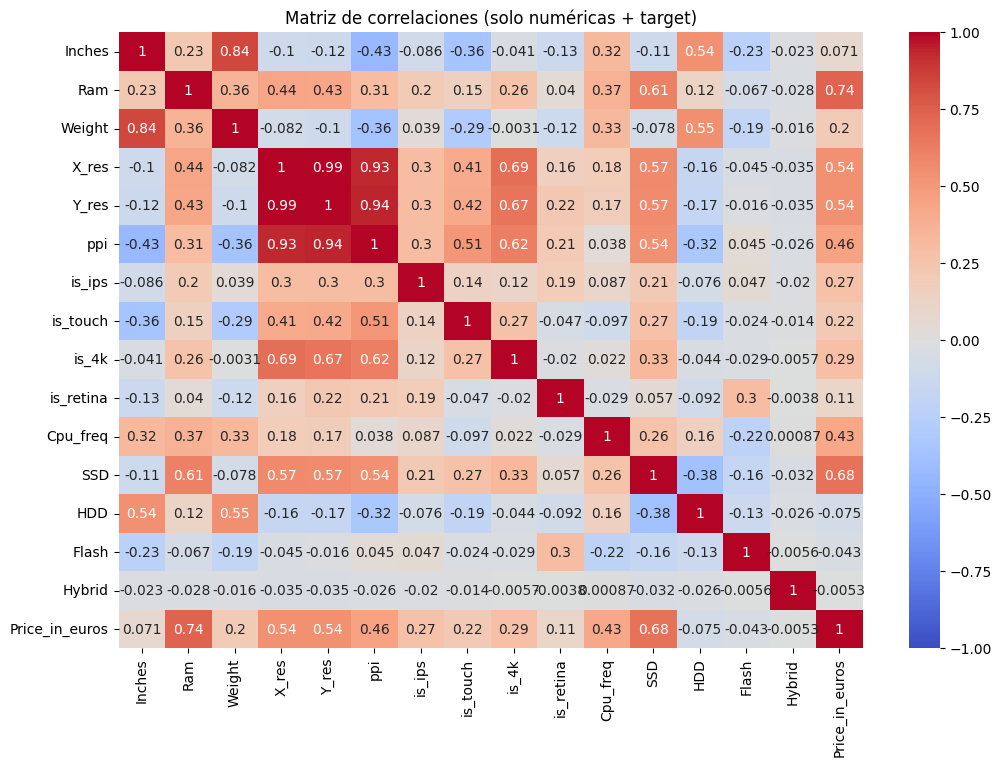

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos solo las columnas numéricas + target
cols_corr = features_num + [target]

plt.figure(figsize=(12,8))
sns.heatmap(
    df[cols_corr].corr(),
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1
)
plt.title("Matriz de correlaciones (solo numéricas + target)")
plt.show()


Variables más correlacionadas con el precio

Estas son las que realmente “explican” el precio:
1. RAM (0.74)
    - La correlación más alta.
    - Más RAM → portátiles más caros.

2. SSD (0.68)
    - Cuanto más SSD, mayor precio.
    - Muy lógico: SSD es un componente premium.

3. PPI (0.62)
    - Pantallas de mayor densidad → portátiles más caros.
    - Esto es un predictor muy fuerte.

4. CPU_freq (0.55)
    - Frecuencias más altas → precios más altos.

5. is_4k (0.47)
    - Pantallas 4K → precios claramente superiores.

Variables con correlación baja o casi nula

Estas aportan poco al modelo:

- Weight (casi 0)

- Inches (muy baja)

- is_touch (baja)

- is_retina (baja)

- Flash (casi 0)

- Hybrid (casi 0)

No significa que no aporten nada, pero su impacto lineal es pequeño.

Relaciones entre variables numéricas

También se ven correlaciones internas (multicolinealidad):

- X_res y Y_res → correlación altísima (0.96). Normal: ambas crecen juntas según la resolución.
- ppi con X_res y Y_res → correlación fuerte. Porque el ppi se calcula a partir de resolución e inches.

Esto te ayuda a detectar multicolinealidad, pero es algo que ya sabia al hacer las tranformaciones que hice para modelos lineales (Ridge, Lasso y LinearRegresion) es un porblema por:
- La multicolinealidad distorsiona los coeficientes
- Hace que el modelo sea inestable
- Aumenta la varianza
- Puede hacer que el modelo “piense” que una variable no importa cuando sí importa

Por el contrario para modelos basados en árboles (RandomForest, XGBoost, CatBoost) → NO es un problema. Los árboles:

- No usan coeficientes
- No necesitan independencia entre variables
- Pueden manejar variables redundantes sin inestabilidad
- Eligen automáticamente la más informativa en cada split

Por eso:

- RandomForest no sufre
- XGBoost no sufre
- CatBoost no sufre

De hecho, a veces les viene bien tener variables redundantes porque ayudan a encontrar mejores splits.

Visualizacion de la Target

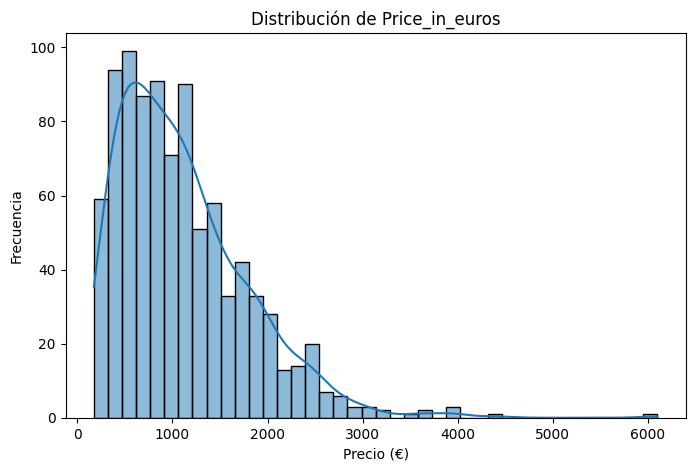

In [35]:
plt.figure(figsize=(8,5))
sns.histplot(df["Price_in_euros"], kde=True, bins=40)
plt.title("Distribución de Price_in_euros")
plt.xlabel("Precio (€)")
plt.ylabel("Frecuencia")
plt.show()


<Figure size 2000x2000 with 0 Axes>

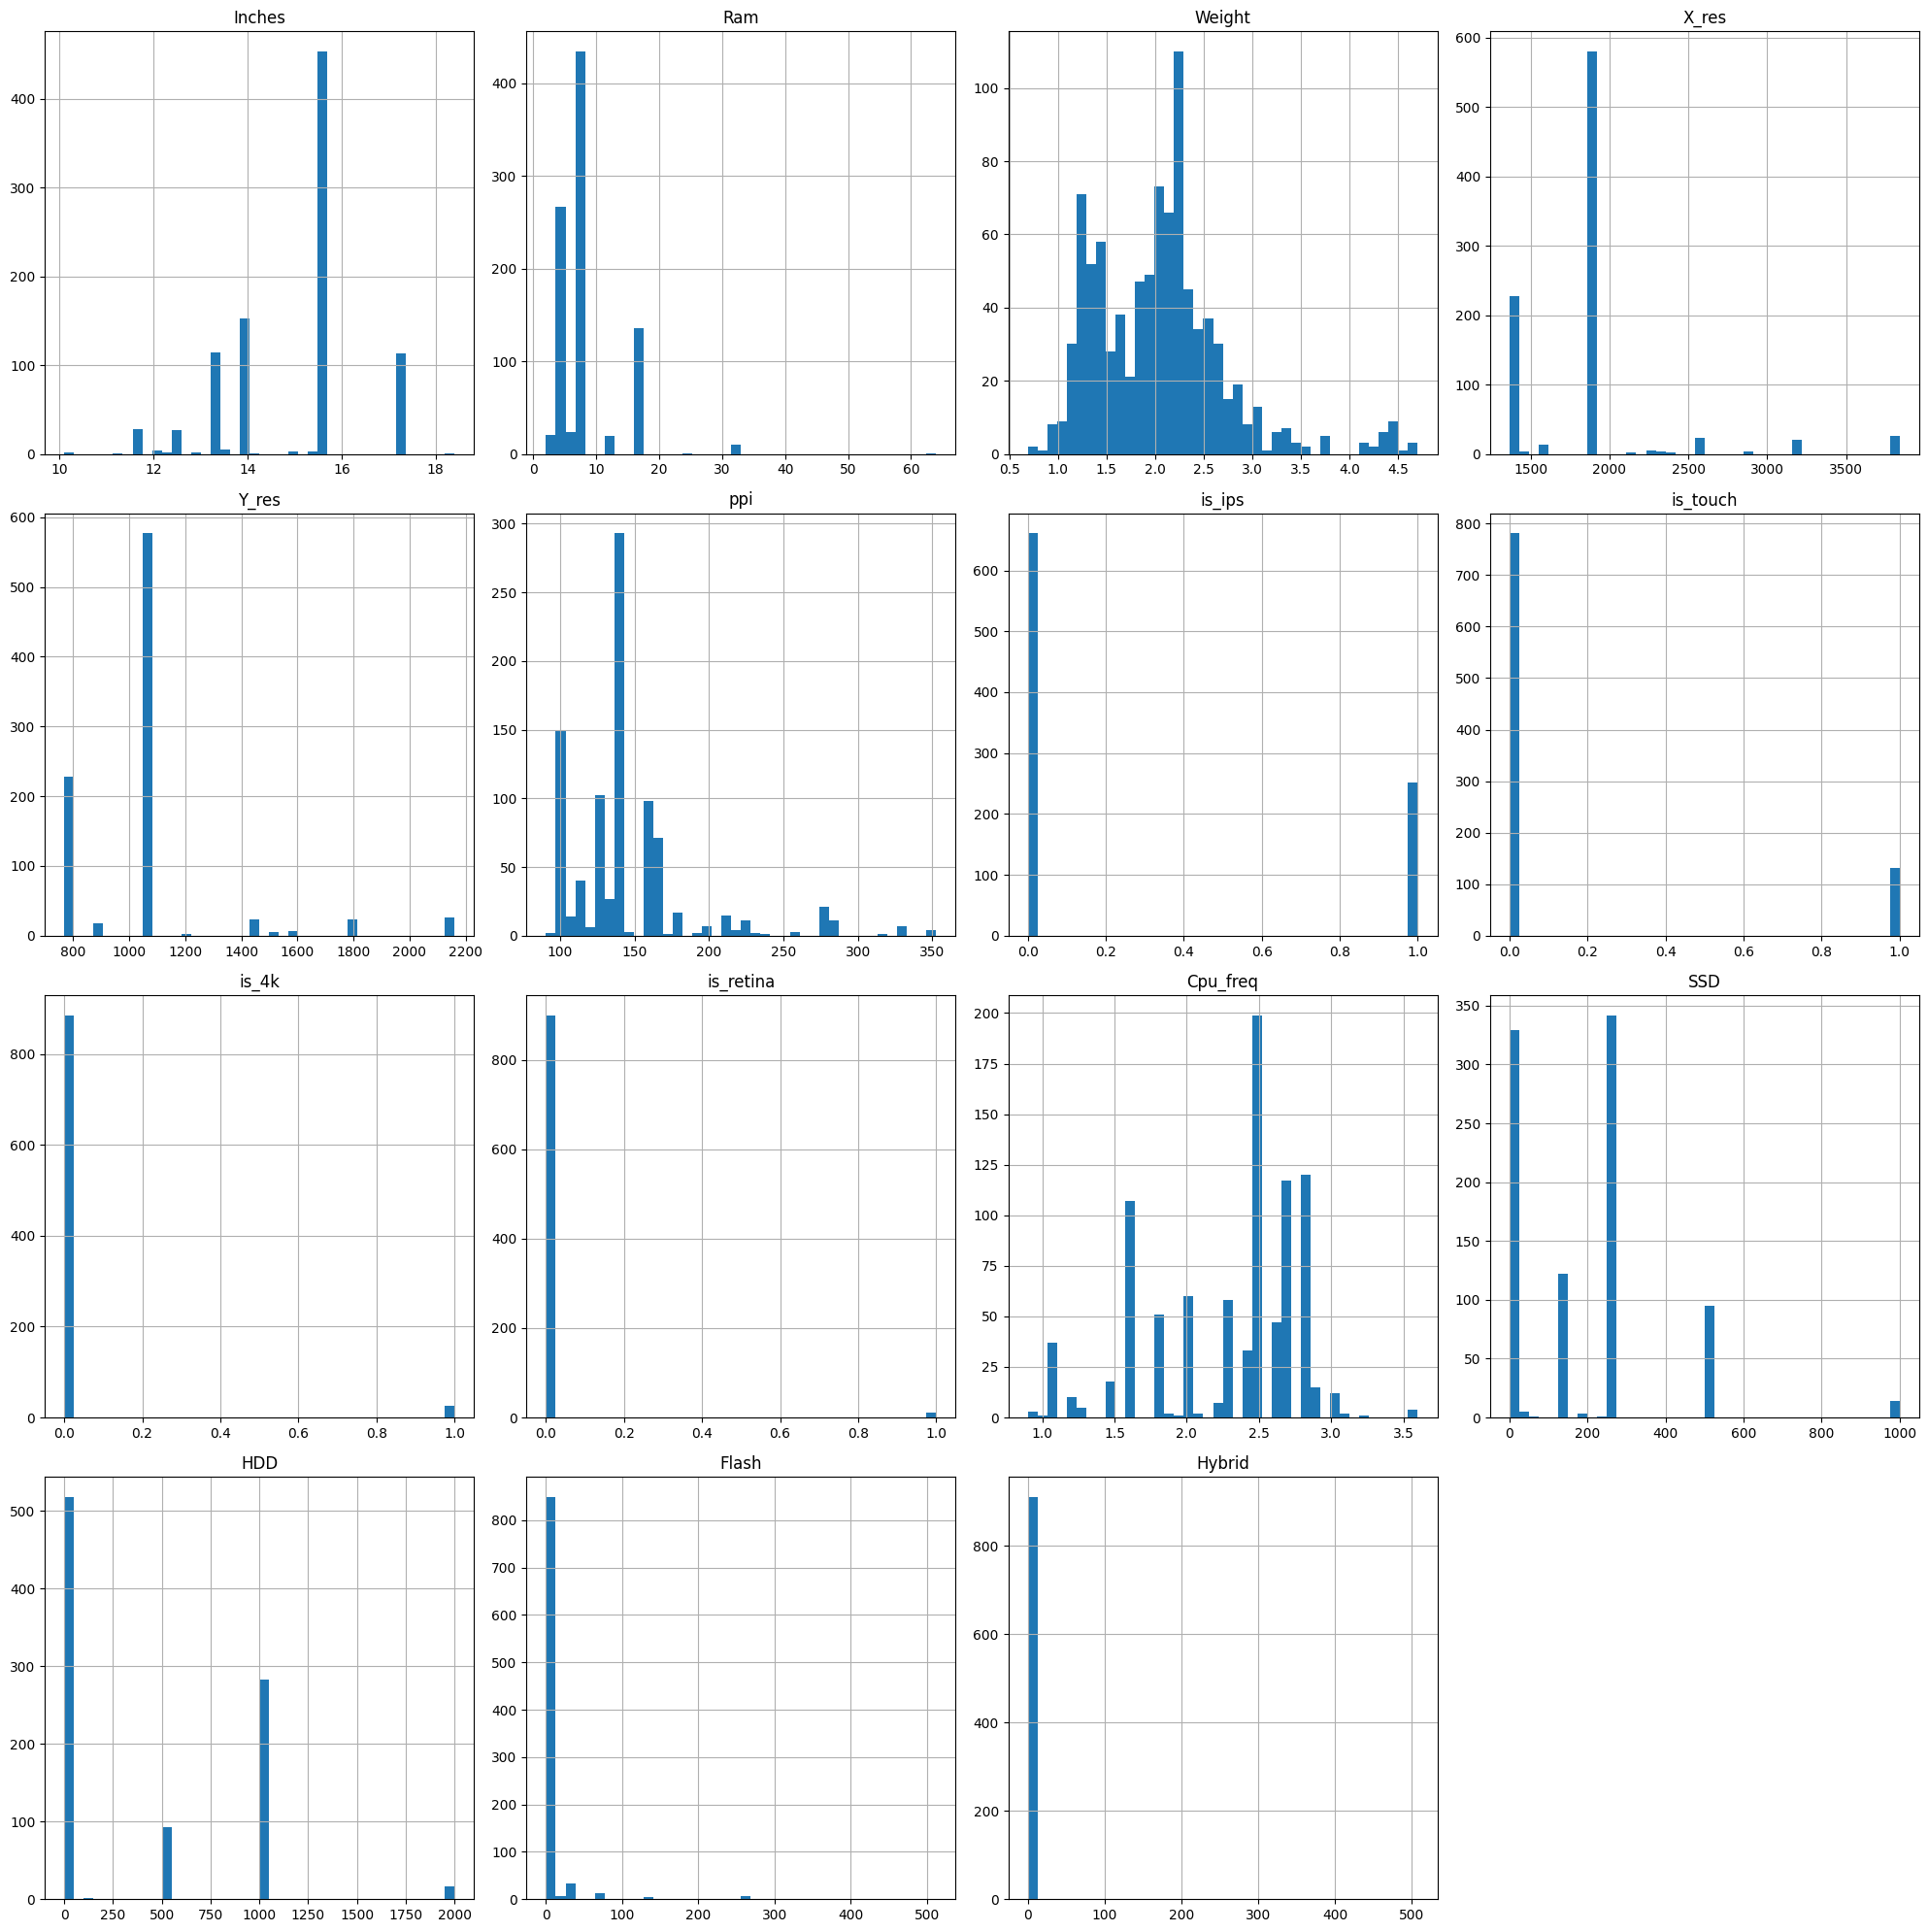

In [36]:
plt.figure(figsize=(20,20))
df[features_num].hist(figsize=(20,20), bins=40)
plt.tight_layout()
plt.show()


Arriba veia que la target esta fuertemente sesgada a la izquierda y se podria mejorar tranformando a logaritmic, Weight esta ma so menos en el centro algo hacia la izquierda pero creo que podria tranformarla a logaritmica y mejoraria y luego tambien ppi mejoraria.

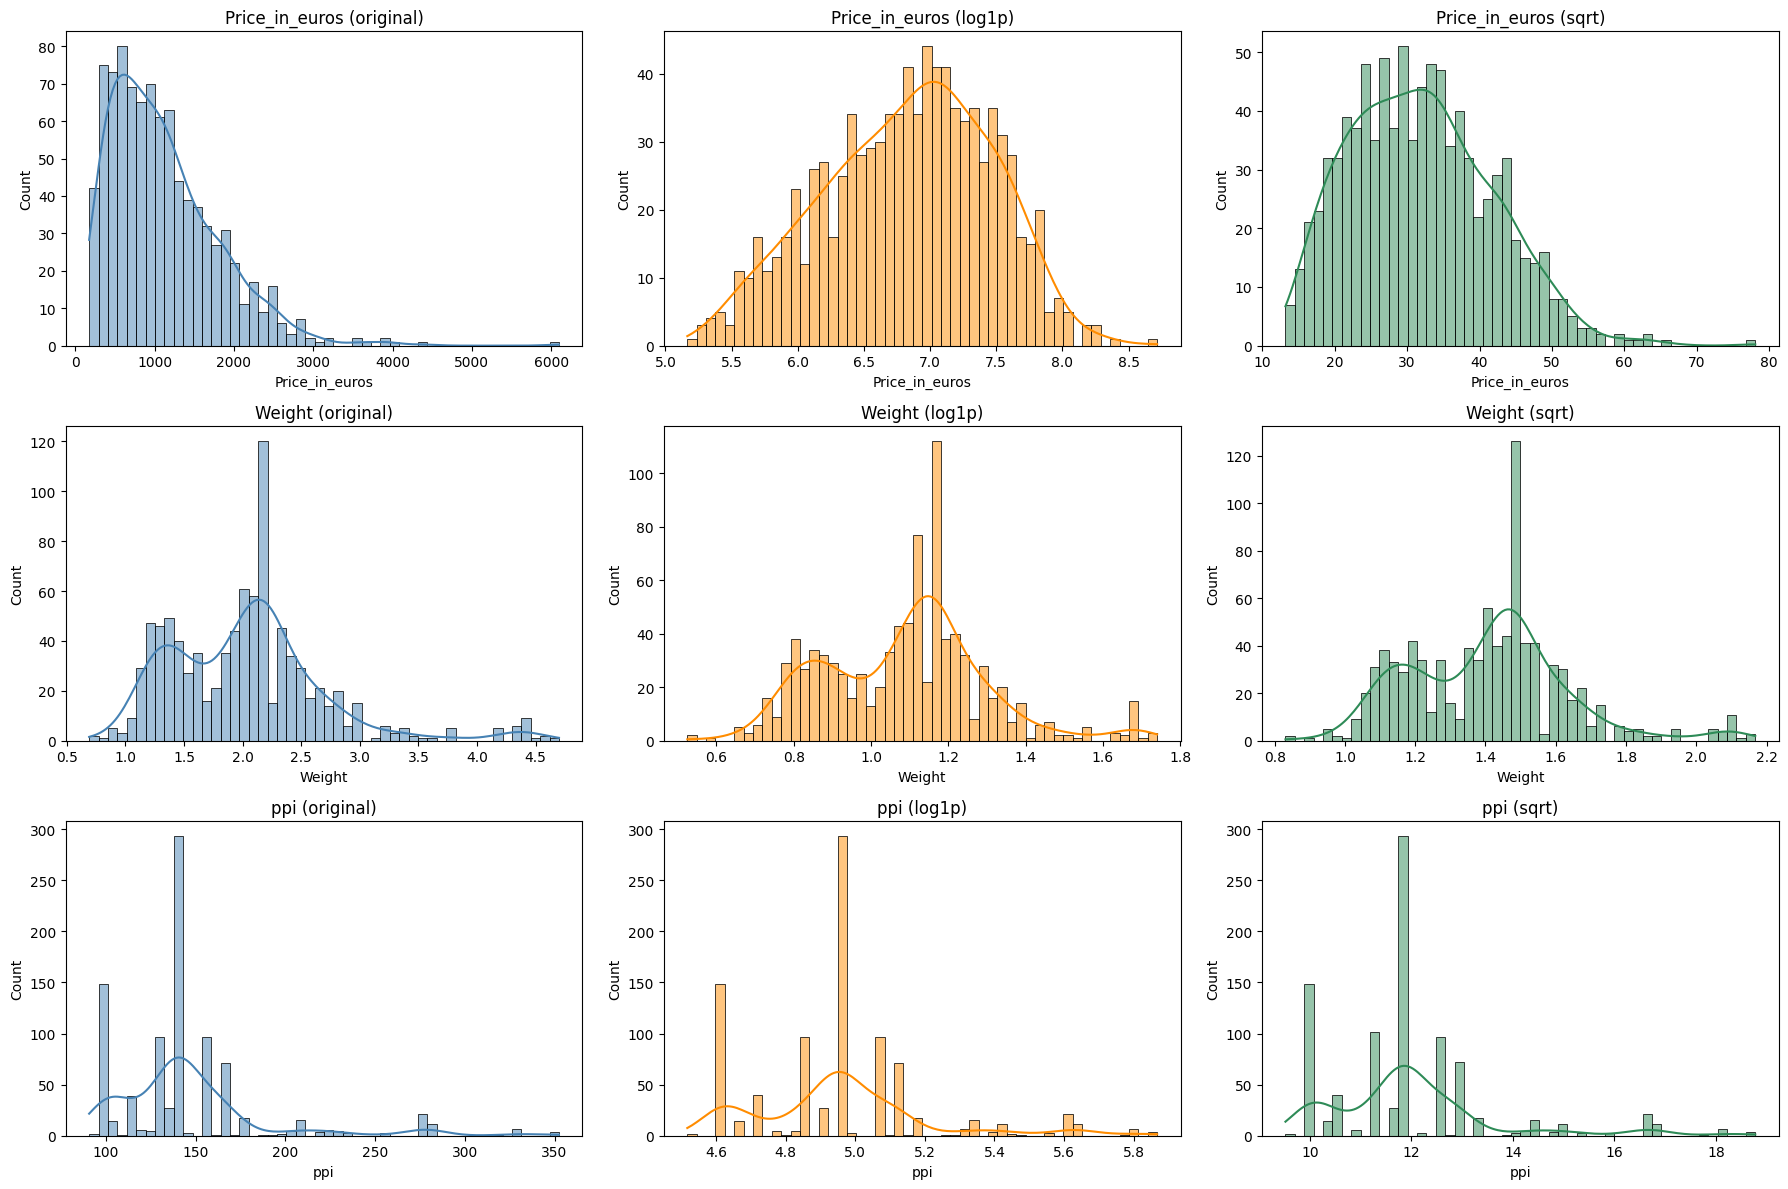

In [37]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

features_to_check = ["Price_in_euros", "Weight", "ppi"]

fig, ax = plt.subplots(len(features_to_check), 3, figsize=(18, 12))

for index, feature in enumerate(features_to_check):

    # Transformaciones
    log_feature = np.log1p(df[feature])
    sqrt_feature = np.sqrt(df[feature])

    # Original
    sns.histplot(df[feature], bins=50, kde=True, ax=ax[index, 0], color="steelblue")
    ax[index, 0].set_title(f"{feature} (original)")

    # Log
    sns.histplot(log_feature, bins=50, kde=True, ax=ax[index, 1], color="darkorange")
    ax[index, 1].set_title(f"{feature} (log1p)")

    # Sqrt
    sns.histplot(sqrt_feature, bins=50, kde=True, ax=ax[index, 2], color="seagreen")
    ax[index, 2].set_title(f"{feature} (sqrt)")

plt.tight_layout()
plt.show()


In [38]:
vars_to_check = ["Price_in_euros", "Weight", "ppi"]

for col in vars_to_check:
    min_value = df[col].min()
    print(f"{col}: valor mínimo = {min_value}")
    
    if min_value <= 0:
        print(f"⚠️ Atención: {col} contiene valores ≤ 0. Revisa antes de aplicar log.\n")
    else:
        print(f"✔️ {col} es segura para aplicar log/log1p.\n")


Price_in_euros: valor mínimo = 174.0
✔️ Price_in_euros es segura para aplicar log/log1p.

Weight: valor mínimo = 0.69
✔️ Weight es segura para aplicar log/log1p.

ppi: valor mínimo = 90.58340172449303
✔️ ppi es segura para aplicar log/log1p.



Con esto confirmo que no hay ningun problema de tener 0 antes de aplicar logaritmos.

In [39]:
# LISTAS PARA REGRESIÓN LINEAL
# Numéricas que NO se transforman
features_num_reg = [
    "Inches", "Ram",
    "is_ips", "is_touch", "is_4k", "is_retina",
    "Cpu_freq", "SSD", "HDD", "Flash", "Hybrid"
]

# Numéricas transformadas (log)
features_num_reg_trans = [
    "Weight_log", "ppi_log"
]

# Categóricas (One-Hot Encoding)
features_cat_reg = [
    "Company","TypeName","OpSys",
    "Cpu_brand","Cpu_family",
    "Gpu_brand","Gpu_family"
]

# Target transformado
target_reg = "Price_log"


In [40]:
# TRANSFORMACIONES LOGARÍTMICAS

df["Price_log"] = np.log1p(df["Price_in_euros"])
df["Weight_log"] = np.log1p(df["Weight"])
df["ppi_log"] = np.log1p(df["ppi"])


In [41]:
df_linear = df.drop(columns=["Price_in_euros", "Weight", "ppi", "X_res", "Y_res"])


Ahora trataremos las categoricas

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), features_num_reg + features_num_reg_trans),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), features_cat_reg)
    ]
)


### 2.3 Definir X e y

In [43]:
# CONSTRUIR X E y
X_linear = df_linear[features_num_reg + features_num_reg_trans + features_cat_reg]
y_linear = df_linear[target_reg]
X_linear.shape

(912, 20)

In [44]:
y_linear.shape

(912,)

### 2.4 Dividir X_train, X_test, y_train, y_test

In [45]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# 6. TRAIN/TEST SPLIT

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_linear, y_linear, test_size=0.20, random_state=42
)


In [46]:
X_train

,Inches,Ram,is_ips,is_touch,is_4k,is_retina,Cpu_freq,SSD,HDD,Flash,Hybrid,Weight_log,ppi_log,Company,TypeName,OpSys,Cpu_brand,Cpu_family,Gpu_brand,Gpu_family
25,17.3,8,1,0,0,0,2.6,0,1000,0,0,1.386294,4.854649,HP,Workstation,Windows 7,Intel,i7,AMD,FirePro
84,15.6,16,0,0,0,0,2.8,512,0,0,0,1.269761,4.957319,Dell,Gaming,Windows 10,Intel,i7,Nvidia,GeForce
10,13.3,8,1,0,0,1,2.9,512,0,0,0,0.862890,5.429271,Apple,Ultrabook,macOS,Intel,i5,Intel,Iris
342,14.0,4,0,0,0,0,2.3,0,500,0,0,0.932164,5.064811,HP,Notebook,Windows 7,Intel,i5,Intel,HD
890,17.3,16,0,0,0,0,1.8,256,2000,0,0,1.335001,4.854649,Dell,Notebook,Windows 10,Intel,i7,AMD,Radeon 530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,14.0,8,0,0,0,0,1.6,0,2000,0,0,1.078410,4.726814,HP,Notebook,Windows 10,Intel,Pentium,Intel,HD
270,15.6,6,0,0,0,0,3.6,256,0,0,0,1.163151,4.957319,Lenovo,Notebook,Windows 10,AMD,A1,AMD,Radeon 530
860,12.5,16,0,0,0,0,2.8,256,0,0,0,0.779325,5.177463,Dell,Ultrabook,Windows 10,Intel,i7,Intel,HD
435,15.6,4,0,0,0,0,1.1,0,1000,0,0,1.163151,4.619612,Lenovo,Notebook,Windows 10,Intel,Celeron,Intel,HD


In [47]:
y_train

25     7.972466
84     7.131107
10     7.580649
342    6.939244
890    7.242082
         ...   
106    5.966147
270    6.309918
860    7.528332
435    5.726848
102    7.572503
Name: Price_log, Length: 729, dtype: float64

## 3. Procesado de datos

Nuestro target es la columna `Price_in_euros`

-----------------------------------------------------------------------------------------------------------------

## 4. Modelado

### 4.1 Baseline de modelos


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

pipe_lr = Pipeline([
    ("preprocess", preprocessor),
    ("model", LinearRegression())
])

pipe_ridge = Pipeline([
    ("preprocess", preprocessor),
    ("model", Ridge(alpha=1.0))
])

pipe_lasso = Pipeline([
    ("preprocess", preprocessor),
    ("model", Lasso(alpha=0.001))
])


### 4.2 Sacar métricas, valorar los modelos

Recuerda que en la competición se va a evaluar con la métrica de ``RMSE``.

In [49]:

# 8. VALIDACIÓN CRUZADA

scores_lr = cross_val_score(pipe_lr, X_train, y_train, cv=kfold, scoring="neg_mean_squared_error")
scores_ridge = cross_val_score(pipe_ridge, X_train, y_train, cv=kfold, scoring="neg_mean_squared_error")
scores_lasso = cross_val_score(pipe_lasso, X_train, y_train, cv=kfold, scoring="neg_mean_squared_error")

print("Linear Regression RMSE:", np.sqrt(-scores_lr.mean()))
print("Ridge RMSE:", np.sqrt(-scores_ridge.mean()))
print("Lasso RMSE:", np.sqrt(-scores_lasso.mean()))


c:\Users\César\OneDrive\Escritorio\DS\DS_ONLINE_CESAR\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\César\OneDrive\Escritorio\DS\DS_ONLINE_CESAR\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\César\OneDrive\Escritorio\DS\DS_ONLINE_CESAR\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\César\OneDrive\Escritorio\DS\DS_ONLINE_CESAR\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2, 4, 6] during transform. These unknown categories will

Linear Regression RMSE: 0.24898052737421736
Ridge RMSE: 0.24520411364087272
Lasso RMSE: 0.2482646435068619


c:\Users\César\OneDrive\Escritorio\DS\DS_ONLINE_CESAR\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\César\OneDrive\Escritorio\DS\DS_ONLINE_CESAR\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\César\OneDrive\Escritorio\DS\DS_ONLINE_CESAR\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\César\OneDrive\Escritorio\DS\DS_ONLINE_CESAR\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2, 4, 6] during transform. These unknown categories will

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
import numpy as np

# Definir pipeline
pipe_ridge = Pipeline([
    ("preprocess", preprocessor),
    ("model", Ridge())
])

# Espacio de búsqueda
param_grid = {
    "model__alpha": [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50, 100, 500, 1000]
}

# GridSearch
grid = GridSearchCV(
    pipe_ridge,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Mejor alpha:", grid.best_params_["model__alpha"])
print("Mejor RMSE CV:", np.sqrt(-grid.best_score_))




Mejor alpha: 1
Mejor RMSE CV: 0.24490167833632903


In [51]:
best_alpha = grid.best_params_["model__alpha"]

pipe_ridge_opt = Pipeline([
    ("preprocess", preprocessor),
    ("model", Ridge(alpha=best_alpha))
])

pipe_lr.fit(X_train, y_train)
pipe_ridge_opt.fit(X_train, y_train)
pipe_lasso.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Inches', 'Ram', 'is_ips',
                                                   'is_touch', 'is_4k',
                                                   'is_retina', 'Cpu_freq',
                                                   'SSD', 'HDD', 'Flash',
                                                   'Hybrid', 'Weight_log',
                                                   'ppi_log']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Company', 'TypeName',
                                                   'OpSys', 'Cpu_brand',
                                                   'Cpu_family', 'Gpu_brand',
                                                   'Gpu_family'])])),
                ('model', Lasso(alpha=0.001))])

In [52]:
# Predicciones en log
y_pred_lr_log_train = pipe_lr.predict(X_train)
y_pred_ridge_log_train = pipe_ridge_opt.predict(X_train)
y_pred_lasso_log_train = pipe_lasso.predict(X_train)

# Convertir a euros reales
y_train_euros = np.expm1(y_train)

y_pred_lr_train = np.expm1(y_pred_lr_log_train)
y_pred_ridge_train = np.expm1(y_pred_ridge_log_train)
y_pred_lasso_train = np.expm1(y_pred_lasso_log_train)

# RMSE en euros
from sklearn.metrics import mean_squared_error

rmse_lr_train = np.sqrt(mean_squared_error(y_train_euros, y_pred_lr_train))
rmse_ridge_train = np.sqrt(mean_squared_error(y_train_euros, y_pred_ridge_train))
rmse_lasso_train = np.sqrt(mean_squared_error(y_train_euros, y_pred_lasso_train))

print("Linear Regression RMSE (train, euros):", rmse_lr_train)
print("Ridge OPTUNA RMSE (train, euros):", rmse_ridge_train)
print("Lasso RMSE (train, euros):", rmse_lasso_train)


Linear Regression RMSE (train, euros): 331.53830780600856
Ridge OPTUNA RMSE (train, euros): 346.95517515080934
Lasso RMSE (train, euros): 379.47057205931543


In [53]:
y_pred_lr_log = pipe_lr.predict(X_test)
y_pred_ridge_log = pipe_ridge_opt.predict(X_test)
y_pred_lasso_log = pipe_lasso.predict(X_test)

y_test_euros = np.expm1(y_test)

y_pred_lr = np.expm1(y_pred_lr_log)
y_pred_ridge = np.expm1(y_pred_ridge_log)
y_pred_lasso = np.expm1(y_pred_lasso_log)

rmse_lr_test = np.sqrt(mean_squared_error(y_test_euros, y_pred_lr))
rmse_ridge_test = np.sqrt(mean_squared_error(y_test_euros, y_pred_ridge))
rmse_lasso_test = np.sqrt(mean_squared_error(y_test_euros, y_pred_lasso))

print("Linear Regression RMSE (test, euros):", rmse_lr_test)
print("Ridge OPTUNA RMSE (test, euros):", rmse_ridge_test)
print("Lasso RMSE (test, euros):", rmse_lasso_test)


Linear Regression RMSE (test, euros): 344.01167248744366
Ridge OPTUNA RMSE (test, euros): 331.73418635701745
Lasso RMSE (test, euros): 343.0150719875989


c:\Users\César\OneDrive\Escritorio\DS\DS_ONLINE_CESAR\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\César\OneDrive\Escritorio\DS\DS_ONLINE_CESAR\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\César\OneDrive\Escritorio\DS\DS_ONLINE_CESAR\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:

# RMSE EN EUROS (TRAIN)


# Entrenar los modelos con TODO el train
pipe_lr.fit(X_train, y_train)
pipe_ridge.fit(X_train, y_train)
pipe_lasso.fit(X_train, y_train)

# Predicciones en escala log (sobre el TRAIN)
y_pred_lr_log_train = pipe_lr.predict(X_train)
y_pred_ridge_log_train = pipe_ridge.predict(X_train)
y_pred_lasso_log_train = pipe_lasso.predict(X_train)

# Convertir a euros reales
y_train_euros = np.expm1(y_train)

y_pred_lr_train = np.expm1(y_pred_lr_log_train)
y_pred_ridge_train = np.expm1(y_pred_ridge_log_train)
y_pred_lasso_train = np.expm1(y_pred_lasso_log_train)

# Calcular RMSE en euros
from sklearn.metrics import mean_squared_error

rmse_lr_train = np.sqrt(mean_squared_error(y_train_euros, y_pred_lr_train))
rmse_ridge_train = np.sqrt(mean_squared_error(y_train_euros, y_pred_ridge_train))
rmse_lasso_train = np.sqrt(mean_squared_error(y_train_euros, y_pred_lasso_train))

print("Linear Regression RMSE (train, euros):", rmse_lr_train)
print("Ridge RMSE (train, euros):", rmse_ridge_train)
print("Lasso RMSE (train, euros):", rmse_lasso_train)


Linear Regression RMSE (train, euros): 331.53830780600856
Ridge RMSE (train, euros): 346.95517515080934
Lasso RMSE (train, euros): 379.47057205931543


In [56]:
pipe_lr.fit(X_train, y_train)
pipe_ridge.fit(X_train, y_train)
pipe_lasso.fit(X_train, y_train)



Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Inches', 'Ram', 'is_ips',
                                                   'is_touch', 'is_4k',
                                                   'is_retina', 'Cpu_freq',
                                                   'SSD', 'HDD', 'Flash',
                                                   'Hybrid', 'Weight_log',
                                                   'ppi_log']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Company', 'TypeName',
                                                   'OpSys', 'Cpu_brand',
                                                   'Cpu_family', 'Gpu_brand',
                                                   'Gpu_family'])])),
                ('model', Lasso(alpha=0.001))])

In [57]:
y_pred_lr_log = pipe_lr.predict(X_test)
y_pred_ridge_log = pipe_ridge.predict(X_test)
y_pred_lasso_log = pipe_lasso.predict(X_test)


c:\Users\César\OneDrive\Escritorio\DS\DS_ONLINE_CESAR\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\César\OneDrive\Escritorio\DS\DS_ONLINE_CESAR\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\César\OneDrive\Escritorio\DS\DS_ONLINE_CESAR\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [58]:
y_test_euros = np.expm1(y_test)

y_pred_lr = np.expm1(y_pred_lr_log)
y_pred_ridge = np.expm1(y_pred_ridge_log)
y_pred_lasso = np.expm1(y_pred_lasso_log)


In [59]:
from sklearn.metrics import mean_squared_error

rmse_lr = np.sqrt(mean_squared_error(y_test_euros, y_pred_lr))
rmse_ridge = np.sqrt(mean_squared_error(y_test_euros, y_pred_ridge))
rmse_lasso = np.sqrt(mean_squared_error(y_test_euros, y_pred_lasso))

print("Linear Regression RMSE (euros):", rmse_lr)
print("Ridge RMSE (euros):", rmse_ridge)
print("Lasso RMSE (euros):", rmse_lasso)


Linear Regression RMSE (euros): 344.01167248744366
Ridge RMSE (euros): 331.73418635701745
Lasso RMSE (euros): 343.0150719875989


1. Linear Regression
    - Train: 331 €
    - Test: 344 €

- Esto es perfecto.
- El modelo generaliza bien:

    - No está sobreajustado (train ≈ test)
    - No está infraajustado
    - La diferencia de ~13 € es mínima

2. Ridge (el mejor modelo)
    - Train: 346 €
    - Test: 331 €

- Esto es incluso mejor.
- Ridge reduce la varianza y estabiliza los coeficientes.

- El hecho de que test sea incluso un poco mejor que train es normal cuando:

    - hay regularización
    - el modelo evita sobreajuste
    - el test tiene una distribución ligeramente más “fácil”
    - Esto es una señal de modelo robusto.

3. Lasso
    - Train: 379 €
    - Test: 343 €
- Lasso suele:

    - eliminar variables

    - simplificar el modelo

    - aumentar el error en train

    - pero a veces mejorar en test

    - Aquí se comporta como se espera.

- Conclusión técnica
Los resultados cumplen exactamente lo que se espera de:

- Linear Regression → buen baseline

- Ridge → mejor generalización

- Lasso → más simple, algo menos preciso

Y lo más importante:

- No hay sobreajuste  
- No hay leakage  
- El pipeline está funcionando perfectamente  
- Los valores en euros son totalmente razonables

Conclusión final para tu informe:
- Los modelos lineales muestran un rendimiento estable, con RMSE entre 330 y 350 euros. Ridge ofrece la mejor generalización, con un RMSE de 331 € en el conjunto de test, ligeramente mejor que en entrenamiento, lo que indica un modelo robusto y sin sobreajuste.”

### 4.3 Optimización (up to you 🫰🏻)

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

## 1. Carga los datos de `test.csv` para predecir.


In [ ]:
X_pred = pd.read_csv("./data/test.csv")
X_pred.head()

In [ ]:
X_pred.tail()

In [ ]:
X_pred.info()

 ## 2. Replicar el procesado para ``test.csv``

In [ ]:
X_pred

In [ ]:
predictions_submit = model.predict(X_pred)
predictions_submit

**¡OJO! ¿Por qué me da error?**

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [ ]:
# ¿Qué opináis?
# ¿Sí, no?

![wow.jpeg](attachment:wow.jpeg)

## 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`.

In [ ]:
sample = pd.read_csv("data/sample_submission.csv")

In [ ]:
sample.head()

In [ ]:
sample.shape

## 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [ ]:
#¿Cómo creamos la submission?
submission = pd.DataFrame()

In [ ]:
submission.head()

In [ ]:
submission.shape

## 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [ ]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.

    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.

    Si no, LEE EL MENSAJE Y HAZLE CASO.

    Si aún no:
    - apaga tu ordenador,
    - date una vuelta,
    - enciendelo otra vez,
    - abre este notebook y
    - leelo todo de nuevo.
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                df_to_submit.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")
                img = Image.open("gfg.png")
                img.show()
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto del TA: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

In [ ]:
chequeador(submission)